**QUESTION:**

> ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.





> Dataset - [url](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In Dataset we have 1338 records with 7 columns.

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

> Our target column is 'charges'. We have to predict the charges by using other columns. If we have data like age, sex, bmi, children, smoker and region then we can estimate the charges for new customers.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Statistics - 

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# sns.set_style('darkgrid')
# matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.figsize'] = (10, 6)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Age**

In [ ]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
bins= df['age'].nunique()
fig = px.histogram(df, x='age',  nbins = bins, marginal = 'box', title = 'Age Distribution')
fig.update_layout(bargap=0.1)


In [ ]:
bins= df['age'].nunique()
fig = px.histogram(df, x='age',  nbins = bins, marginal = 'box', title = 'Age Distribution' , color = 'sex')
fig.update_layout(bargap=0.1)


Between age 18 to 20 count is nearly double than other ages. For other all ages data is uniformly distributed. 

**BMI**



> Body Mass Index (BMI) 
Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. 

[BMI Table](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.htm)



In [ ]:
fig = px.histogram(df, x = 'bmi', marginal = 'box', color_discrete_sequence=['#b00a02'], 
                   title= 'Distribution of BMI')
fig.update_layout(bargap=0.1)

![](https://kingswayhospitals.com/wp-content/uploads/2021/08/bmi-1024x655.jpg)

**Gender**

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
 px.pie(df, names = 'sex', color = 'sex', title = 'Gender', color_discrete_sequence=['#00171c', '#54d9f7'])

In [ ]:
fig = px.histogram(df, x='charges', marginal='box', title='Annual Medical Charges' ,
                   color_discrete_sequence=['#074a0b'])
fig.update_layout(bargap=0.1)

In [ ]:
fig = px.histogram(df, x='charges', marginal='box', title='Annual Medical Charges' ,
                   color_discrete_sequence=['#00171c', '#54d9f7'],
                   color = 'smoker')
fig.update_layout(bargap=0.1)

* For most of the customers,  medical charges are under 
12k

* Few customers have higher medical charges

* For non smokers median charges - \$ 7.5k  and
  For smokers median charges - \$ 34.5 k 

In [ ]:
fig = px.histogram(df, x='charges', marginal='box', title='Annual Medical Charges' ,
                   color_discrete_sequence=['#00171c', '#54d9f7'],
                   color = 'sex')
fig.update_layout(bargap=0.1)

In [ ]:
fig = px.histogram(df, x='charges', marginal='box', title='Annual Medical Charges' ,
                   color_discrete_sequence=['#00171c', '#54d9f7','#074a0b','#0afc1a'],
                   color = 'region')
fig.update_layout(bargap=0.1)

In [ ]:
 px.pie(df, names = 'smoker', color = 'smoker', title = 'Gender', 
        color_discrete_sequence=['#00171c', '#54d9f7'])

In [ ]:
px.histogram(df, x='smoker', color='sex', title='Smoker',
             color_discrete_sequence=['#00171c', '#54d9f7'],text_auto=True)

In [ ]:
df['smoker'].value_counts(normalize = True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

80% customers are non smokers.

**Children**

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
fig = px.histogram(df, x='children', title = 'children count')
fig.update_layout(bargap=0.1)

> Almost 43% customers have 0 child, this is because large part of customers are in younger age group

lets check the correlation of children column with target column

In [ ]:
  df['children'].corr(df['charges'])

0.0679982268479048

In [ ]:
plt.style.use("ggplot")

Text(0, 0.5, 'Count')

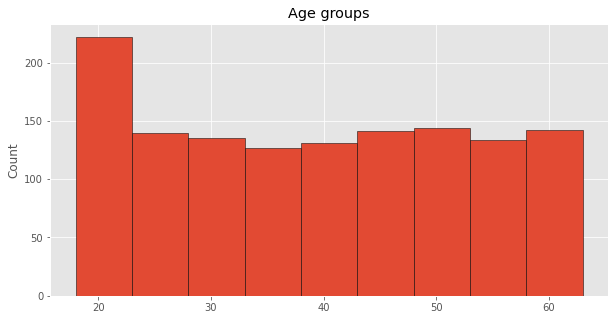

In [ ]:
plt.figure(figsize=(10,5))
bins = np.arange(18,67,5)
plt.hist(df['age'],bins=bins,edgecolor='k')
plt.title("Age groups")
plt.ylabel('Count')

#### Before understanding the relationship of features with target lets try to analyze the correlation


***

# Dispertion of Data - (Measures of Variability)

Dispertion of Data helps to understand the distribution of data. It helps to understand the variation of data and provides a piece of information about the distribution data.

1. Range
2. IQR 
3. Variance
4. Standard Deviation 

> **Range -**     
 $Range = Highest \hspace{.5cm} value \hspace{.5cm}  – \hspace{.5cm} Lowest \hspace{.5cm} value$  
> The range can influence by outliers.

> **IQR** -     
IQR is preferred over a range as, like a range, IQR does not influence by outliers. IQR is used to measure variability by splitting a data set into four equal quartiles.          
 $IQR = Q3 - Q1$   
       
**Formula to find outliers -**   
   > $[Q1 – 1.5 * IQR, Q3 + 1.5 * IQR]$   
   If the value does not fall in the above range it considers outliers.


> **Variance -**    
Variance measures how far each number in the dataset from the mean. To compute variance first, calculate the mean and squared deviations from a mean.        
$Population \hspace{.5cm} Variance (\sigma^2) = {\sum(x_i - \mu)^2} / N$  
$Sample \hspace{.5cm} Variance (S^2) = {\sum(x_i - \bar x)^2} / n-1$    


> **Standard Deviation -**      
Standard deviation is a squared root of the variance to get original values. Low standard deviation indicates data points close to mean.  
$Population SD = \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}$       
$Sample SD = s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2}$     


# Covariance - 
- We use Covariance to classify the relationships between two variables.
- It is a measure of the linear relationship between two random variables 

**Three Types -**    
* Positive Covariance -  It indicates that two variables tend to move in the same direction, which means that if we increase the value of one variable other variable value will also increase.


* Zero Covariance -  It indicates that there is no linear relationship between them.


* Negative Covariance -  It indicates that two variables tend to move in the opposite direction, which means that if we increase the value of one variable other variable value will decrease and vice versa.

> $cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

**Limitations -**    
- Covariance magnitude does not signify the strength of their relationship, so what only matters is the sign, whether it is positive or negative which tells the relationship

- Covariance does not tells, if the slope is steep or not

- Covariance does not tells, if the points are relatively close to the line or not

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Covariance_trends.svg/255px-Covariance_trends.svg.png"></center>

# Correlation - 
It is a type of bivariate statistical analysis because two features fet involve.

Correlation is a statistical measure that expresses the extent to which two variables are linearly related .




**Strength -**  
The greater the absolute value of the correlation coefficient, the stronger the relationship.

- The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

- A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

- When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

**Direction -**    
The sign of the correlation coefficient represents the direction of the relationship.

- Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

- Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

<center><img src = 'https://www.j-pcs.org/articles/2018/4/2/images/JPractCardiovascSci_2018_4_2_116_240962_f1.jpg'></center>

Formula for population Correlation     

 <img src ='https://wikimedia.org/api/rest_v1/media/math/render/svg/f76ccfa7c2ed7f5b085115086107bbe25d329cec'>

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

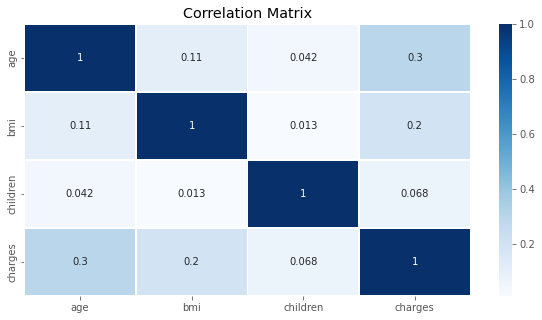

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), linewidths=.5, cmap = 'Blues', annot=True)
plt.title('Correlation Matrix')

we can see age is more correlated with target column among the all numeric column

we have to see the correlation of other categorical columns such as gender, smoker, children and region

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df['smoker'].map(smoker_values)
df['charges'].corr(smoker_numeric)

0.787251430498478

Now -  smoker and college seems to highlycorrelated with charges.

lets try to analyze relationship of features with target column 'Charges'

**Age and Charges**

Text(0.5, 1.0, 'Age vs Charges')

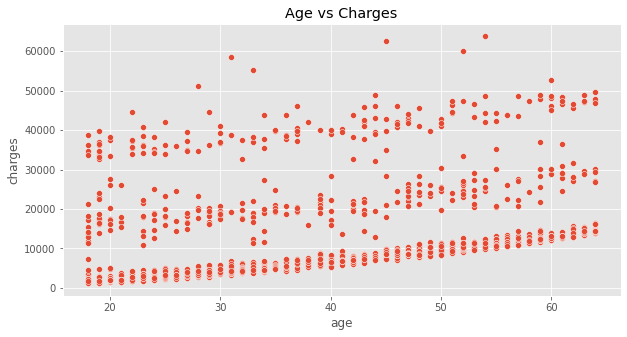

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= df['age'], y= df['charges'])
plt.title('Age vs Charges')

Text(0.5, 1.0, 'bmi vs Charges')

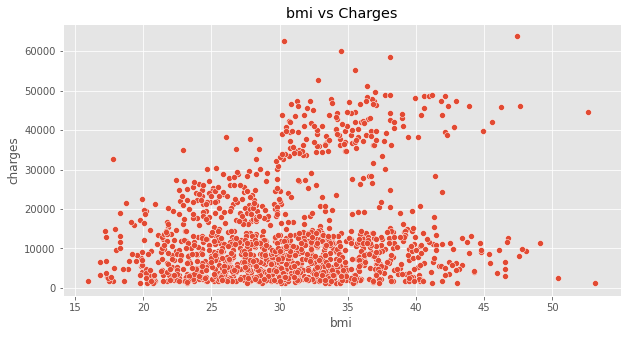

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= df['bmi'], y= df['charges'])
plt.title('bmi vs Charges')

Smoker column seems highly correlated - 

In [ ]:
px.scatter(df, x = df['age'], y = df['charges'], color = df['smoker'],
           title = 'Age vs Charges')

for smokers age does not seems much related with charges but for non smokers age seems positively correlated with charges (some outliers)

In [ ]:
px.scatter(df, x = df['bmi'], y = df['charges'], color = df['smoker'],
           title = 'BMI vs Charges')

It seems for smoker BMI is positively correlated with charges, however for non smokers BMI does not seems to be related with charges.

In [ ]:
px.violin(df, x = df['smoker'], y = df['charges'], box = True, color = df['sex'],
           title = 'Smoke vs Charges')

# Linear Regression with Single Feature - 

In [ ]:
px.scatter(df , x = df['age'] , y = df['charges'] , title = 'Age VS Charges' , color = df['smoker'])


age and charges showing linear relation

we can use straight line to predict new points. 

**FORMULA**

$y = wx + b$

$w$ is slope and $b$ is intercept

with respect to this case - 

charges = $w$ × age + $b$

We'll try determine w and b for the line that best fits the data.

- This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

- The numbers w and b are called the parameters or weights of the model.

- The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".


In [ ]:
def estimate_charges (w, b, age):
  charges = w * age + b
  return charges

In [ ]:
estimate_charges(100,60,20)

2060

In [ ]:
non_smokers_df = df[df['smoker']=='no']

Text(0.5, 1.0, 'Age vs Charges')

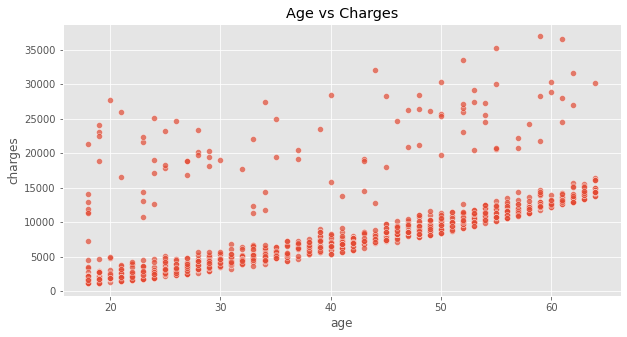

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=non_smokers_df, x='age', y='charges', alpha=0.7);
plt.title('Age vs Charges')


In [ ]:
w = 50
b = 100

In [ ]:
est_charges = estimate_charges(w , b , non_smokers_df['age'])

Text(0, 0.5, 'estimated charges')

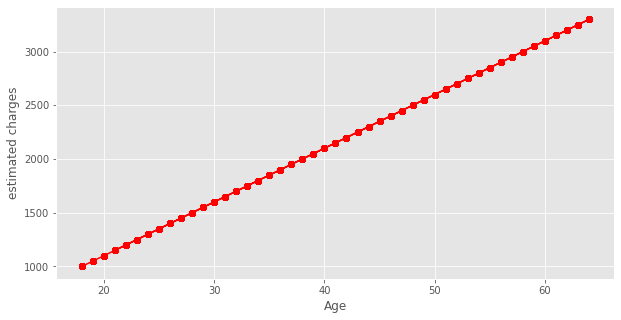

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(non_smokers_df['age'] , est_charges , 'r-o')

plt.xlabel('Age')
plt.ylabel('estimated charges')

our estimated charges and age shows straight line 

lets try to compare it with our actual data 

Text(0.5, 1.0, 'Comparison between estimates charges and actual charges')

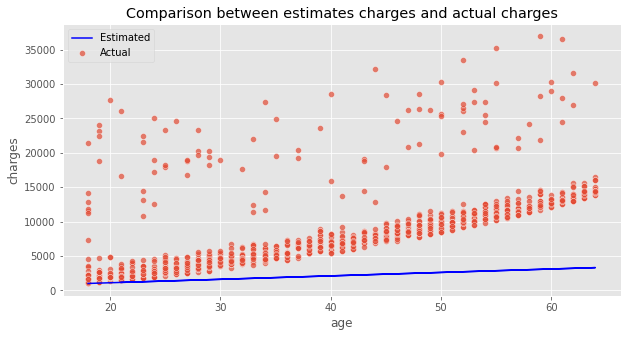

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=non_smokers_df, x='age', y='charges', alpha=0.7)
plt.plot(non_smokers_df['age'] , est_charges,'b-' )

plt.legend(['Estimated', 'Actual'])
plt.title('Comparison between estimates charges and actual charges')

lets define a function to change and try new values for w and b 

In [ ]:
def try_param(w,b):
  ages = non_smokers_df['age']
  target = non_smokers_df['charges']
  estimated_charges = estimate_charges(w,b,ages)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  sns.scatterplot(data=non_smokers_df, x='age', y='charges', alpha=0.7)
  plt.legend(['Estimated'])

will try different values of w and b and try to visually fit the line of estimated charges into actual charges.

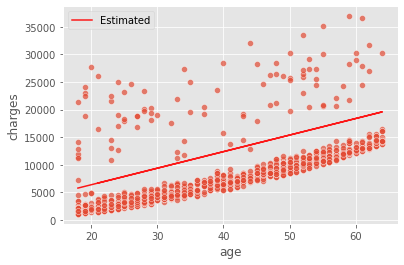

In [ ]:
try_param(300,400)

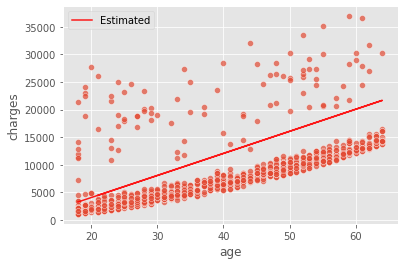

In [ ]:
try_param(400,-3920)

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "age" and "charges". 

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [ ]:
def rmse(targets, predictions):
  return (np.sqrt(np.mean(np.square(targets-predictions))))

In [ ]:
w = 500
b = 400

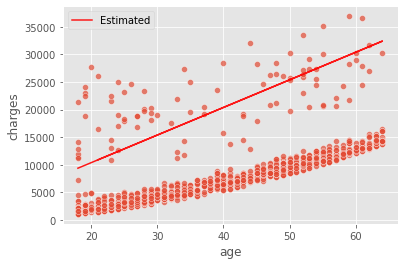

In [ ]:
try_param(w,b)

In [ ]:
targets = non_smokers_df['charges']
predictions = estimate_charges(w,b, non_smokers_df['age'])

In [ ]:
rmse(targets,predictions)

12976.59396582722

we can say that on average each predicted value for charges differs from actual value of charges by $12,976

we will try to reduce the difference by  adjusting w and b

In [ ]:
def try_param(w,b):
  ages = non_smokers_df['age']
  target = non_smokers_df['charges']
  estimated_charges = estimate_charges(w,b,ages)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  sns.scatterplot(data=non_smokers_df, x='age', y='charges', alpha=0.7)
  plt.legend(['Estimated'])
  loss = rmse(target, estimated_charges)
  print("RMSE -", loss)

RMSE - 5479.863790948557


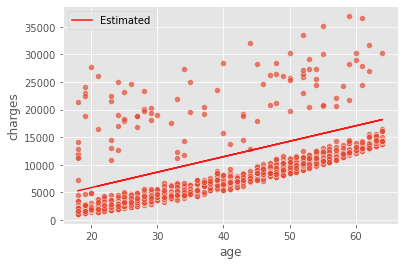

In [ ]:
try_param(280,280)

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

### Linear Regression using Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



we can see for `model.fit()` the input variable is must be a dataframe


we have only one feature as input which is age but we will pass it as dataframe



In [ ]:
inputs = non_smokers_df[['age']]
targets = non_smokers_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
model.predict(np.array([[18],
                       [22]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2719.0598744 , 3788.05552572])

In [ ]:
model.predict([[18], [22]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2719.0598744 , 3788.05552572])

will see the rmse for this predictions

In [ ]:
predictions = model.predict(inputs)

In [ ]:
rmse(targets,predictions)

4662.505766636391

In [ ]:
# w
model.coef_

array([267.24891283])

In [ ]:
# b
model.intercept_

-2091.4205565650864

RMSE - 4662.505766636391


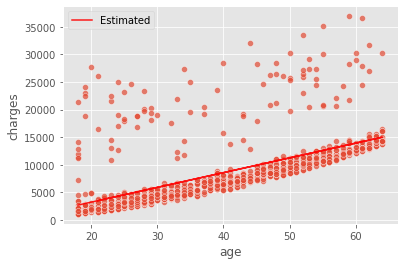

In [ ]:
try_param(model.coef_, model.intercept_)

### Machine Learning

Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

 Here's how the relationship between these three components can be visualized:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

In [ ]:
# Create inputs and targets
inputs = non_smokers_df[['age']]
targets = non_smokers_df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636391


## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [ ]:
# Create inputs and targets
inputs = non_smokers_df[['age', 'bmi']]
targets = non_smokers_df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312835461297


we can see adding bmi slightly reduces the loss. this is because BMIhave weak correlation with target column 'charges' 

In [ ]:
non_smokers_df['charges'].corr(non_smokers_df['bmi'])

0.0840365431283327

In [ ]:
model.coef_

array([266.87657817,   7.07547666])

In [ ]:
model.intercept_

-2293.6320906488727

in `model.coef_` we can see the weightage for bmi is very less. beacause it is not strongly correlated to charges.

now will see the `children`
which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$





In [ ]:
px.violin(non_smokers_df, x = 'children', y = 'charges', box = True)

In [ ]:
px.strip(non_smokers_df, x = 'children', y = 'charges')

In [ ]:
non_smokers_df['children'].corr(non_smokers_df['charges'])

0.13892870453542194

In [ ]:
# Create inputs and targets
inputs = non_smokers_df[['age', 'bmi', 'children']]
targets = non_smokers_df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


adding `children` reduces the loss more than BMI beacause it correlated more with target.

Now lets see the loss for whole df - 

In [ ]:
# Create inputs and targets
inputs = df[['age', 'bmi', 'children']]
targets = df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125969


Loss is much higher...

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

### Binary categories 

Features that have only 2 values. Smoker column has 2 values yes and no. we will  create new column smoker_code that will store the yes value as 1 and no value as 0

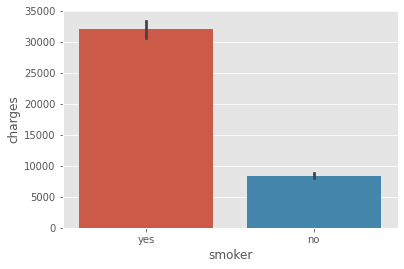

In [ ]:
sns.barplot(data=df, x='smoker', y='charges')

In [ ]:
smoker_code = {'yes':1, 'no':0}

In [ ]:
df['smoker_code'] = df['smoker'].map(smoker_code)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
df['charges'].corr(df['smoker_code'])

0.787251430498478

Now we can use the `smoker_code` column in our equation - 



$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [ ]:
# Create inputs and targets
inputs = df[['age', 'bmi', 'children', 'smoker_code']]
targets = df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188077


The loss reduces from `11355` to `6056`, almost by 50%!

Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

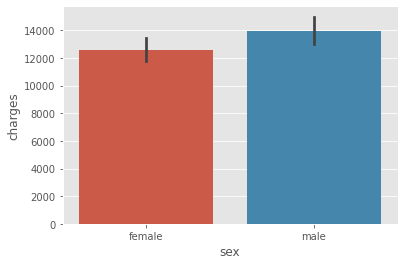

In [ ]:
sns.barplot(data=df, x='sex', y='charges')

In [ ]:
sex_codes = {'female': 0, 'male': 1}

In [ ]:
df['sex_codes'] = df['sex'].map(sex_codes)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
df['sex_codes'].corr(df['charges'])

0.05729206220202548

In [ ]:
# Create inputs and targets
inputs = df[['age', 'bmi', 'children', 'smoker_code', 'sex_codes']]
targets = df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754538


`sex` column does not have much impact on 'charges' column

### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

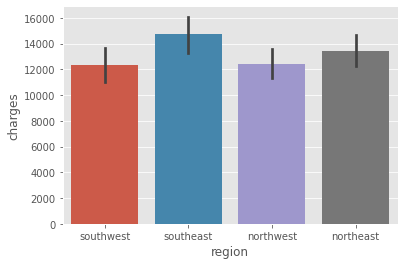

In [ ]:
sns.barplot(data=df, x='region', y='charges')

In [ ]:
from sklearn import preprocessing

In [ ]:
enc = preprocessing.OneHotEncoder(sparse=False)
onehot = enc.fit_transform(df[['region']])


NameError: ignored

In [ ]:
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
[new_cols]= enc.categories_

In [ ]:
new_cols

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:
df[new_cols] = onehot

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
new_cols_list = new_cols.tolist()

In [ ]:
new_cols_list

['northeast', 'northwest', 'southeast', 'southwest']

Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [ ]:
# Create inputs and targets
inputs = df[['age', 'bmi', 'children', 'smoker_code', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174453


## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times northeast + w_7 \times northwest + w_8 \times southeast + w_9 \times southwest + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

-12525.547811195444

In [ ]:
input_cols = inputs.columns.tolist()

In [ ]:
df[input_cols].loc[1] ## checking first record 

age            18.00
bmi            33.77
children        1.00
smoker_code     0.00
sex_codes       1.00
northeast       0.00
northwest       0.00
southeast       1.00
southwest       0.00
Name: 1, dtype: float64

In [ ]:
model.predict([[25,34,2,1,1,1,0,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([30683.66893285])

In [ ]:
weight_df = pd.DataFrame({
    
            'feature': input_cols,
            'weightage': model.coef_

})

In [ ]:
weight_df

,feature,weightage
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756


In [ ]:
weight_df.sort_values('weightage', ascending=False)

,feature,weightage
3,smoker_code,23848.534542
5,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
6,northwest,234.045336
4,sex_codes,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [ ]:
from sklearn import preprocessing

In [ ]:
num_cols = ['age','bmi','children']

In [ ]:
scaler = preprocessing.StandardScaler().fit(df[num_cols])

In [ ]:
scaler

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
num_cols_scaled = scaler.transform(df[num_cols])

In [ ]:
num_cols_scaled 

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
df[['age_scaled', 'bmi_scaled', 'children_scaled']] = num_cols_scaled 

In [ ]:
cat_cols = ['smoker_code', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']

In [ ]:
inp_cols =  ['age_scaled', 'bmi_scaled', 'children_scaled', 
             'smoker_code', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest'
              ]

In [ ]:
# Create inputs and targets
inputs = df[inp_cols]
targets = df['charges']

# Create and train the model
model = LinearRegression()
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174454


In [ ]:
weight_df = pd.DataFrame({
    
            'feature': inp_cols,
            'weightage': model.coef_

})
weight_df.sort_values('weightage', ascending=False)

,feature,weightage
3,smoker_code,23848.534542
0,age_scaled,3607.472736
1,bmi_scaled,2067.691966
5,northeast,587.009235
2,children_scaled,572.998210
6,northwest,234.045336
4,sex_codes,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


the most important feature are:

1. Smoker
2. Age
3. BMI


### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df[inp_cols]
y= df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)

# Compute loss to evalute the model
loss = rmse(y_test, predictions)
print('Test Loss:', loss)

Test Loss: 5659.858705675155


Let's compare this with the training loss.

In [ ]:

# Generate predictions
predictions_train = model.predict(X_train)

# Compute loss to evalute the model
loss = rmse(y_train, predictions_train)
print('Train Loss:', loss)

Train Loss: 6137.849111732928
